In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [16]:
#Importamos el dataset sobre el que trabajaremos
data = pd.read_csv('BankChurners.csv')

#Revisamos sus primeras líneas
data.head(15)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [17]:
# Revisamos la estructura general del dataset
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [32]:
# Primero debemos deshacernos de las columnas que no son necesarias para el dataset

datos = data[data.columns[:-2]]
datos = datos.drop(['CLIENTNUM'], axis=1)

In [33]:
# Revisamos si hay datos nulos 

datos.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [34]:
# Revisamos que no haya datos mal escritos o incorrectos (basándonos en la explicacion del dataset https://www.kaggle.com/sakshigoyal7/credit-card-customers)

"""CLIENTNUM = Client number. Unique identifier for the customer holding the account

Attrition_Flag = Internal event (customer activity) variable - if the account is closed then 1 else 0

Customer_Age = Demographic variable - Customer's Age in Years

Gender = Demographic variable - M=Male, F=Female

Dependent_count = Demographic variable - Number of dependents

Education_Level = Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

Marital_Status = Demographic variable - Married, Single, Divorced, Unknown

Income_Category = Demographic variable - Annual Income Category of the account holder (<  40𝐾, 40K - 60K,  60𝐾− 80K,  80𝐾− 120K, $120K >)

Card_Category = Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

Months_on_book = Period of relationship with bank

Total_Relationship_Count = Total no. of products held by the customer

Months_Inactive_12_mon = No. of months inactive in the last 12 months

Contacts_Count_12_mon = No. of Contacts in the last 12 months

Credit_Limit = Credit Limit on the Credit Card

Total_Revolving_Bal = Total Revolving Balance on the Credit Card

Avg_Open_To_Buy = Open to Buy Credit Line (Average of last 12 months)

Total_Amt_Chng_Q4_Q1 = Change in Transaction Amount (Q4 over Q1)

Total_Trans_Amt = Total Transaction Amount (Last 12 months)

Total_Trans_Ct = Total Transaction Count (Last 12 months)

Total_Ct_Chng_Q4_Q1 = Change in Transaction Count (Q4 over Q1)

Avg_Utilization_Ratio = Average Card Utilization Ratio"""
    
    
for i in datos.columns:
    print(datos[i].name)
    print(len(datos[i].unique()), datos[i].unique())

Attrition_Flag
2 ['Existing Customer' 'Attrited Customer']
Customer_Age
45 [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
Gender
2 ['M' 'F']
Dependent_count
6 [3 5 4 2 0 1]
Education_Level
7 ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status
4 ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category
6 ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category
4 ['Blue' 'Gold' 'Silver' 'Platinum']
Months_on_book
44 [39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
Total_Relationship_Count
6 [5 6 4 3 2 1]
Months_Inactive_12_mon
7 [1 4 2 3 6 0 5]
Contacts_Count_12_mon
7 [3 2 0 1 4 5 6]
Credit_Limit
6205 [12691.  8256.  3418. ...  5409.  5281. 10388.]
Total_Revolving_Bal
1974 [ 777  864    0 ...  534  476 2241]
Avg_Open_To_Buy

In [35]:
# Revisamos si hay duplicados

duplicados = datos.duplicated() 
duplicados.sum()

0

In [36]:
# Descartamos los outilers con el método del z-score
# Dividimos las columnas del dataset en numéricas y categóricas

num_datos = datos.select_dtypes(include=["number"])
cat_datos = datos.select_dtypes(exclude=["number"])

outliers_row = np.all(stats.zscore(num_datos) < 3, axis=1)

datos_cleaned = pd.concat([num_datos.loc[outliers_row], cat_datos.loc[outliers_row]], axis=1)

In [37]:
datos_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9325 entries, 5 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              9325 non-null   int64  
 1   Dependent_count           9325 non-null   int64  
 2   Months_on_book            9325 non-null   int64  
 3   Total_Relationship_Count  9325 non-null   int64  
 4   Months_Inactive_12_mon    9325 non-null   int64  
 5   Contacts_Count_12_mon     9325 non-null   int64  
 6   Credit_Limit              9325 non-null   float64
 7   Total_Revolving_Bal       9325 non-null   int64  
 8   Avg_Open_To_Buy           9325 non-null   float64
 9   Total_Amt_Chng_Q4_Q1      9325 non-null   float64
 10  Total_Trans_Amt           9325 non-null   int64  
 11  Total_Trans_Ct            9325 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1       9325 non-null   float64
 13  Avg_Utilization_Ratio     9325 non-null   float64
 14  Attriti

In [46]:
# Hacemos grupos para luego analizarlos y compararlos

# Agrupación por sexo
datos_cleaned.mujer = datos_cleaned[datos_cleaned['Gender'] == "F"]
datos_cleaned.hombre = datos_cleaned[datos_cleaned['Gender'] == "M"]

# Agrupación por tipo de cliente
datos_cleaned.existente = datos_cleaned[datos_cleaned['Attrition_Flag'] == "Existing Customer"]
datos_cleaned.nuevo = datos_cleaned[datos_cleaned['Attrition_Flag'] == "Attrited Customer"]

# Agrupación por tipo de tarjeta
datos_cleaned.azul = datos_cleaned[datos_cleaned['Card_Category'] == "Blue"]
datos_cleaned.oro = datos_cleaned[datos_cleaned['Card_Category'] == "Gold"]
datos_cleaned.plata = datos_cleaned[datos_cleaned['Card_Category'] == "Silver"]
datos_cleaned.platino = datos_cleaned[datos_cleaned['Card_Category'] == "Platinum"]

<ipython-input-46-7781836966f8>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  datos_cleaned.mujer = datos_cleaned[datos_cleaned['Gender'] == "F"]
<ipython-input-46-7781836966f8>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  datos_cleaned.hombre = datos_cleaned[datos_cleaned['Gender'] == "M"]
<ipython-input-46-7781836966f8>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  datos_cleaned.existente = datos_cleaned[datos_cleaned['Attrition_Flag'] == "Existing Customer"]
<ipython-input-46-7781836966f8>:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/

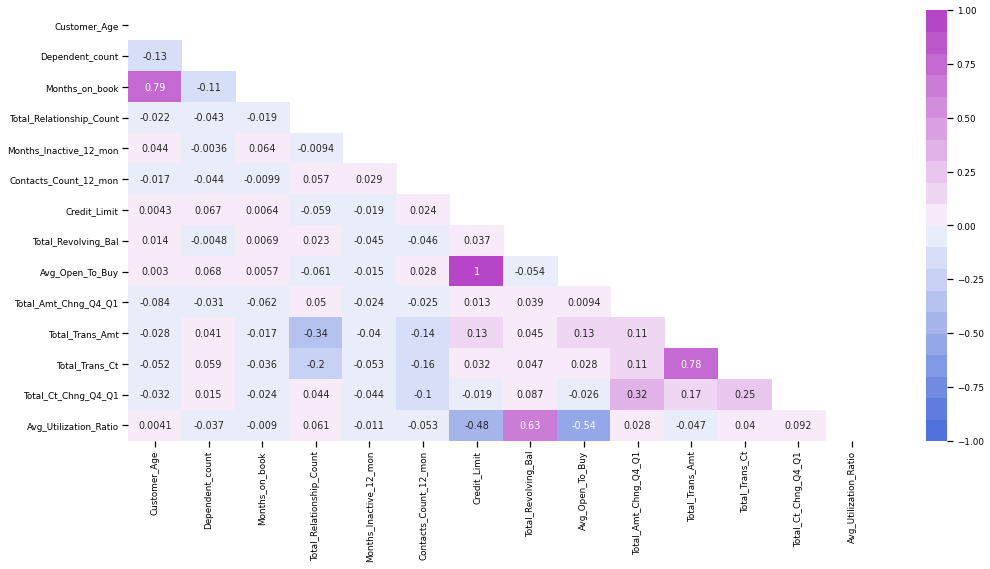

In [85]:
# Vamos a revisar la correlacion de las variables numéricas entre si, con intención de no utilizar tantas variables para nuestro modelo.

plt.figure(figsize=(15,8))
sns.set_context(context='notebook',font_scale=.8)
sns.heatmap(datos_cleaned.corr(method='pearson'),cmap=sns.diverging_palette(260, 300, n=20),annot=True, mask = mask,vmin = -1, vmax = 1)
plt.tight_layout()